<a href="https://colab.research.google.com/github/SmartShopLearny/YOLOv8-Object-Recognition-as-Inter-Class-Similarities/blob/main/SmartShop_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPLIT into Train Valid Test**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import shutil
from google.colab import drive

# Define paths to image and label folders
image_folder = '/content/drive/MyDrive/SmartShop_Resmed/resize_image'
label_folder = '/content/drive/MyDrive/SmartShop_Resmed/labels'

# Define paths to save the split datasets
train_image_folder = '/content/drive/MyDrive/datasets/train/images'
train_label_folder = '/content/drive/MyDrive/datasets/train/labels'
val_image_folder = '/content/drive/MyDrive/datasets/valid/images'
val_label_folder = '/content/drive/MyDrive/datasets/valid/labels'
test_image_folder = '/content/drive/MyDrive/datasets/test/images'
test_label_folder = '/content/drive/MyDrive/datasets/test/labels'

# Define the percentages of data to allocate to each split
train_split = 0.7
val_split = 0.2
test_split = 0.1

# Create the train, validation, and test folders if they don't exist
os.makedirs(train_image_folder, exist_ok=True)
os.makedirs(train_label_folder, exist_ok=True)
os.makedirs(val_image_folder, exist_ok=True)
os.makedirs(val_label_folder, exist_ok=True)
os.makedirs(test_image_folder, exist_ok=True)
os.makedirs(test_label_folder, exist_ok=True)

# Get a list of all image and label filenames
image_filenames = sorted(os.listdir(image_folder))
label_filenames = sorted(os.listdir(label_folder))

# Determine the number of images for each split
num_images = len(image_filenames)
num_train = int(num_images * train_split)
num_val = int(num_images * val_split)
num_test = num_images - num_train - num_val

# Copy the images and labels to the appropriate split folders
for i in range(num_images):
    image_filename = image_filenames[i]
    label_filename = label_filenames[i]
    if i < num_train:
        shutil.copy(os.path.join(image_folder, image_filename), train_image_folder)
        shutil.copy(os.path.join(label_folder, label_filename), train_label_folder)
    elif i < num_train + num_val:
        shutil.copy(os.path.join(image_folder, image_filename), val_image_folder)
        shutil.copy(os.path.join(label_folder, label_filename), val_label_folder)
    else:
        shutil.copy(os.path.join(image_folder, image_filename), test_image_folder)
        shutil.copy(os.path.join(label_folder, label_filename), test_label_folder)

IndexError: ignored

# **Make data.yaml**

In [ ]:
import json
import os
import yaml

# Define the paths to the class and JSON files
class_file_path = '/content/drive/MyDrive/SmartShop_Resmed/classes.txt'
json_file_path = '/content/drive/MyDrive/SmartShop_Resmed/notes.json'
yaml_file_path = '/content/drive/MyDrive/dataset.yaml'

# Load the class names from the text file
with open(class_file_path, 'r') as f:
    class_names = [line.strip() for line in f.readlines()]

# Load the class IDs from the JSON file
with open(json_file_path, 'r') as f:
    class_ids = json.load(f)

# Define the class IDs and names
class_names = [line.strip() for line in open('/content/drive/MyDrive/SmartShop_Resmed/classes.txt')]
class_ids = {class_names[i]: i for i in range(len(class_names))}

# Define the categories list using the class IDs and names
categories = [{'id': class_ids[class_names[i]], 'name': class_names[i]} for i in range(len(class_names))]

# Define the dictionary to be converted to YAML
data = {'train': '/content/drive/MyDrive/SmartShop_Resmed/datasets/train',
        'val': '/content/drive/MyDrive/SmartShop_Resmed/datasets/valid',
        'nc': len(categories),
        'names': class_names,
        'backup': '/content/drive/MyDrive/SmartShop_Resmed/backup'}

# Add the categories list to the dictionary
data['categories'] = categories

# Convert the dictionary to YAML
yaml_data = yaml.dump(data)

# Save the YAML file
with open('/content/drive/MyDrive/SmartShop_Resmed/dataset.yaml', 'w') as f:
    f.write(yaml_data)

# **Clone & Get YOLOV8**

In [ ]:
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
!pip install -e .

Cloning into 'ultralytics'...
remote: Enumerating objects: 8159, done.
remote: Counting objects: 100% (1764/1764), done.
remote: Compressing objects: 100% (928/928), done.
remote: Total 8159 (delta 1063), reused 1259 (delta 812), pack-reused 6395
Receiving objects: 100% (8159/8159), 5.94 MiB | 24.35 MiB/s, done.
Resolving deltas: 100% (5414/5414), done.
/content/ultralytics
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/ultralytics
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 17.2 MB/s eta 0:00:00
  Running setup.py develop for ultralytics


In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display #import image
display.clear_output() #clear output display

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# **Train Custom Data**

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data='/content/drive/MyDrive/SmartShop_Resmed/dataset.yaml' epochs=5 imgsz=314 plots=True

100% 6.23M/6.23M [00:00<00:00, 86.3MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/SmartShop_Resmed/dataset.yaml, epochs=5, patience=50, batch=16, imgsz=314, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=F

# **Get Confusion_matrix**

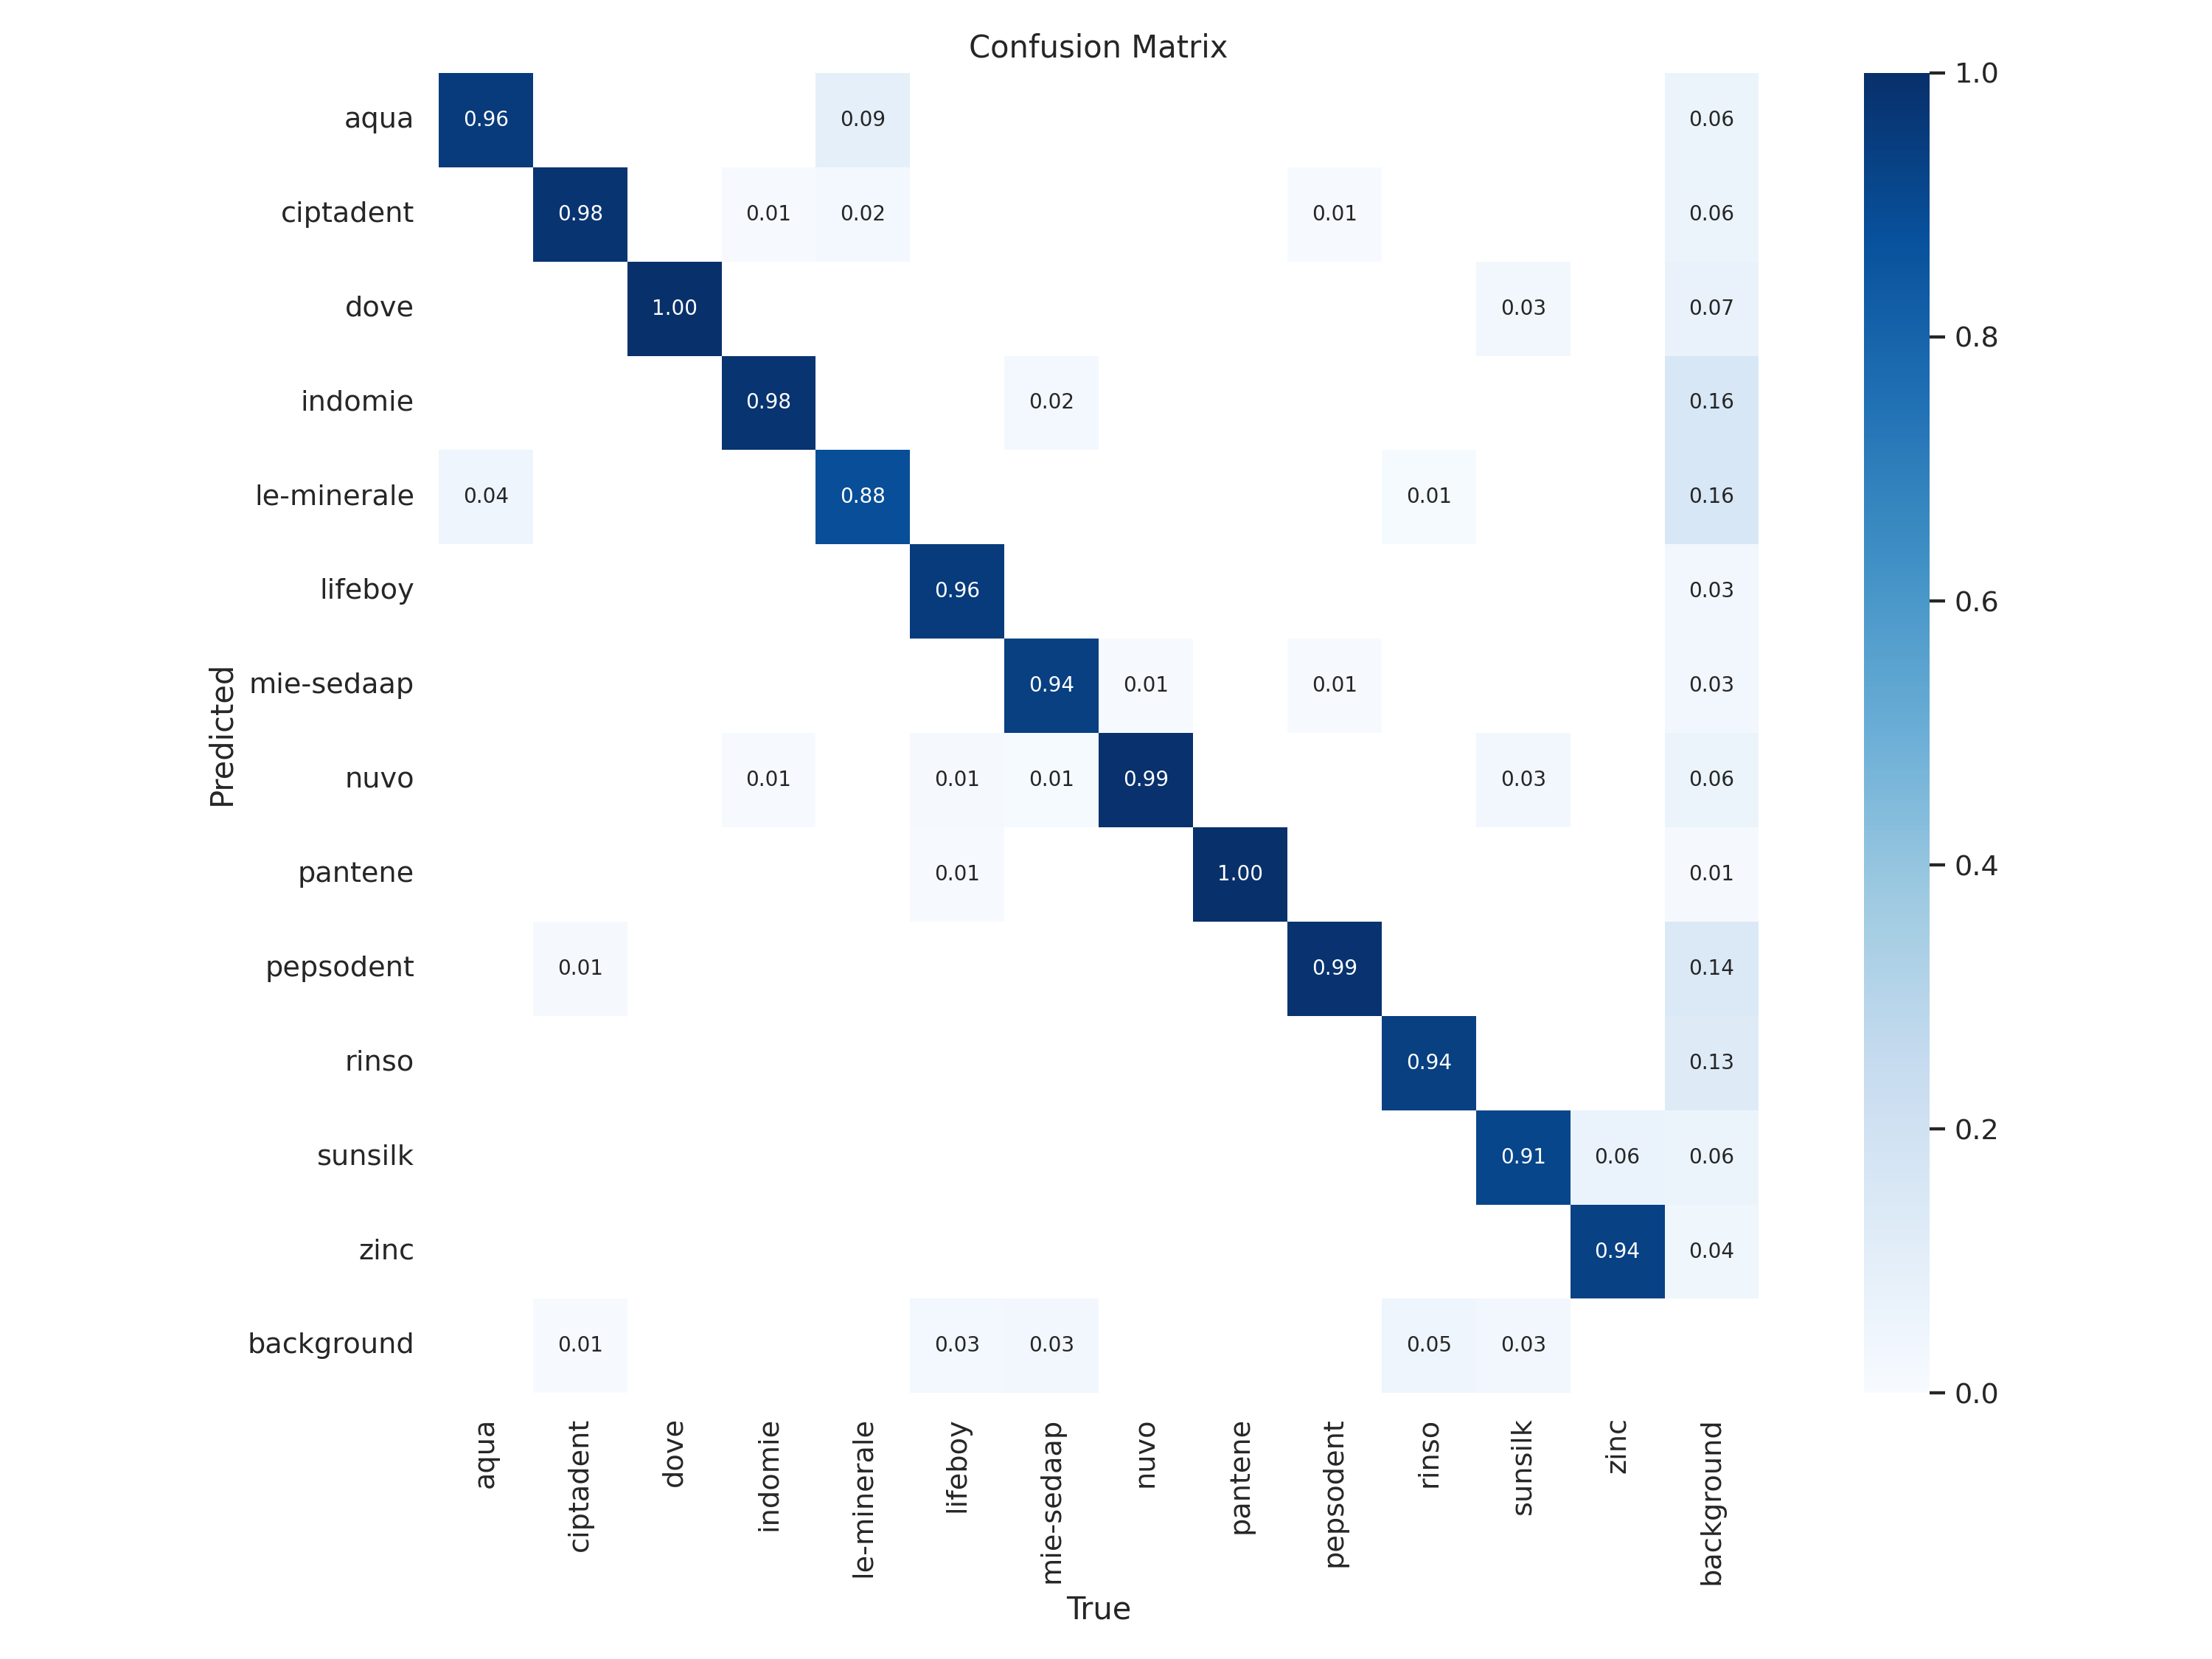

In [ ]:
Image(filename='/content/ultralytics/runs/detect/train/confusion_matrix.png', width=600)

# **Get the Graph Result**

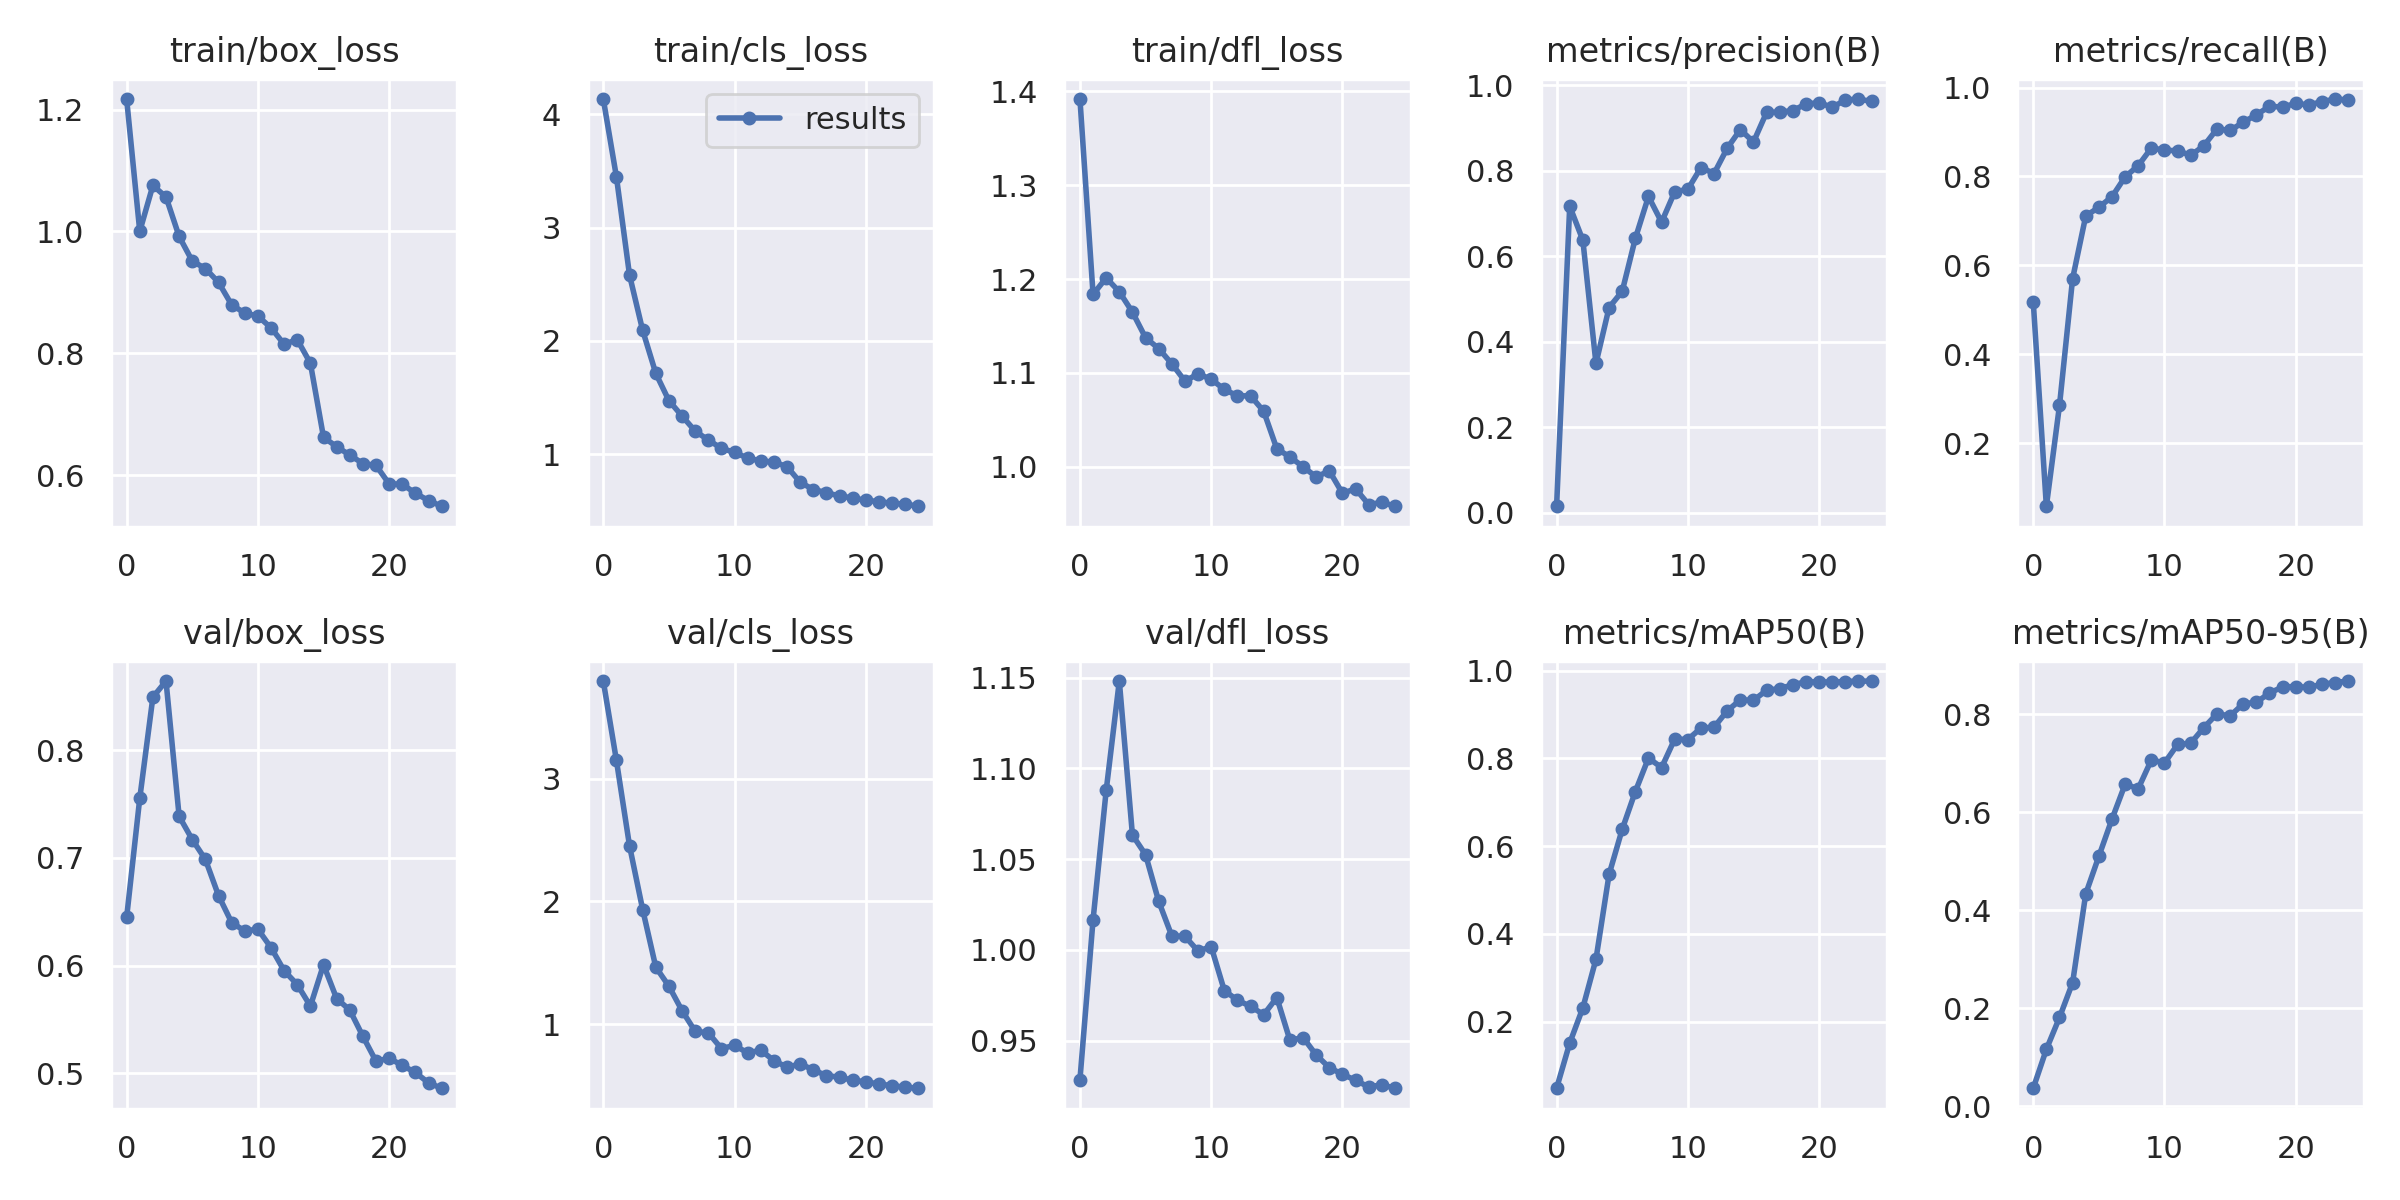

In [ ]:
Image(filename='/content/ultralytics/runs/detect/train/results.png', width=600)

# **Show Prediction**

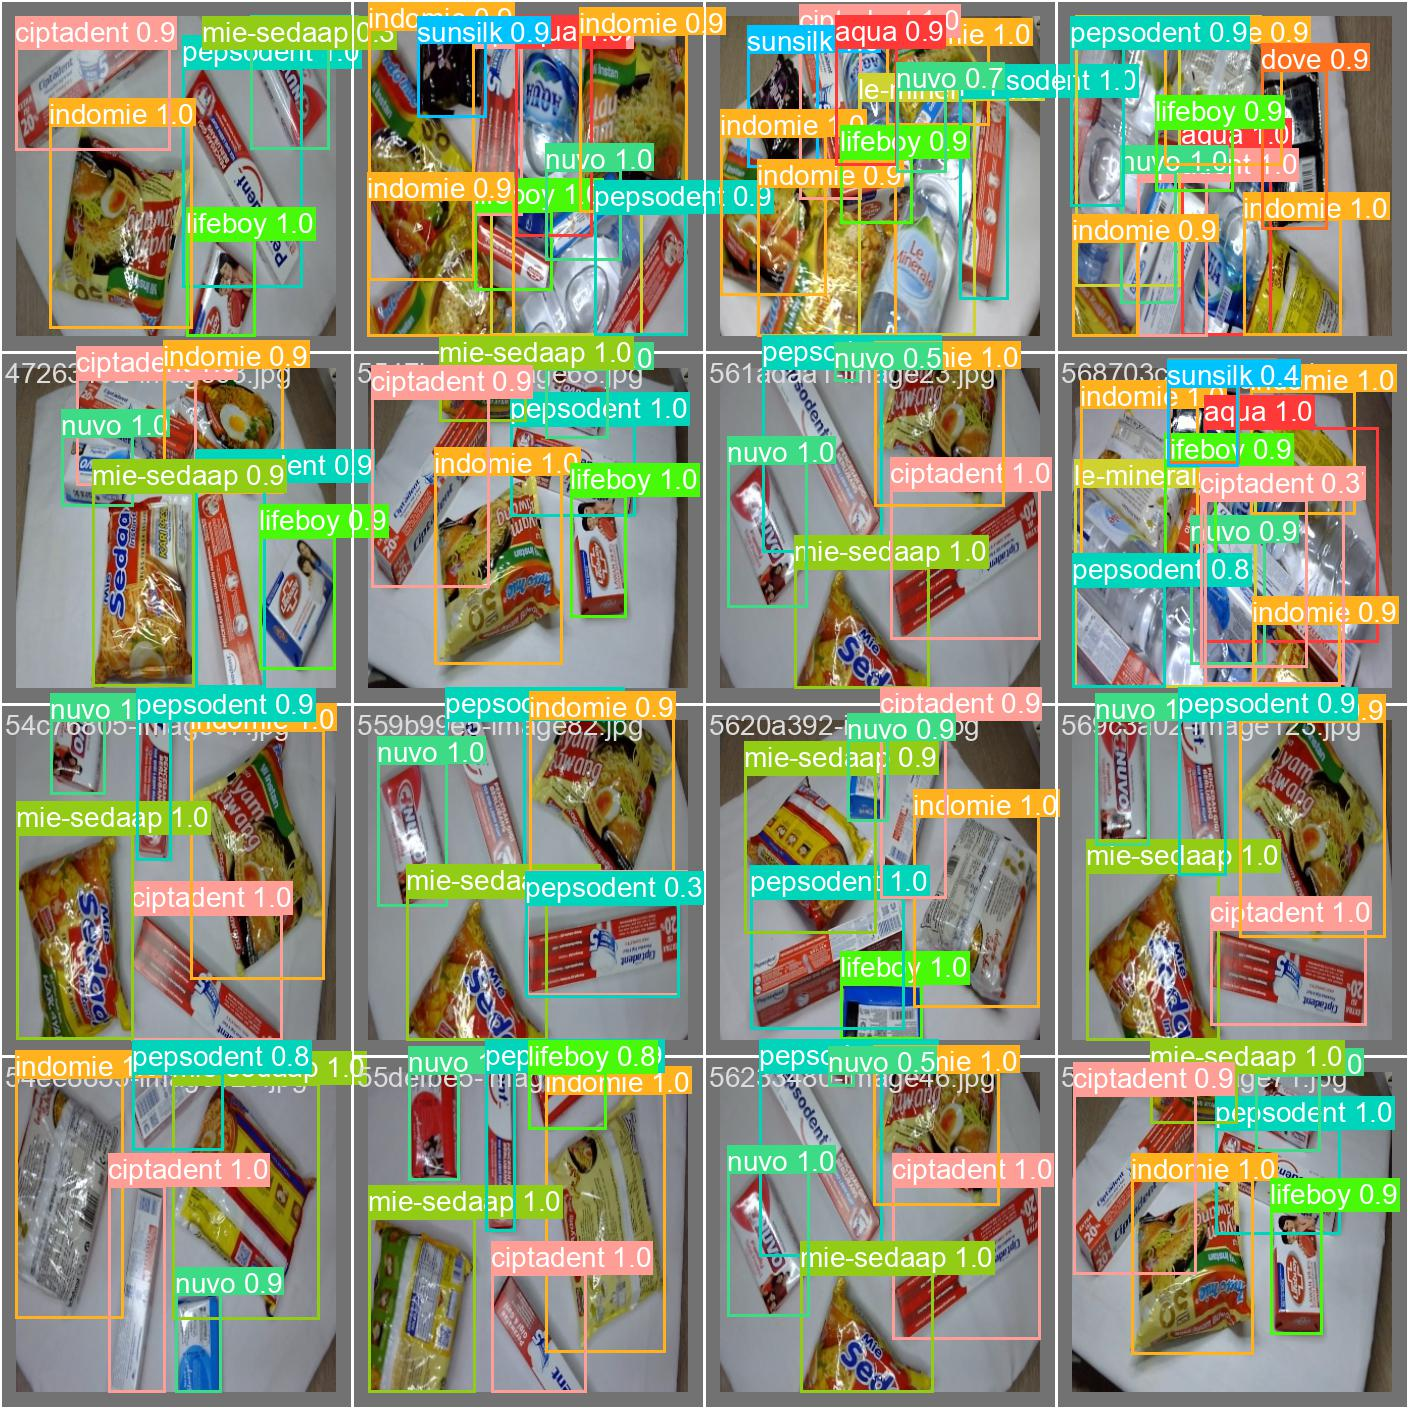

In [ ]:
Image(filename='/content/ultralytics/runs/detect/train/val_batch0_pred.jpg', width=600)

# **Validate Custom Model**

In [ ]:
!yolo task=detect mode=val model='/content/ultralytics/runs/detect/train/weights/best.pt' data='/content/drive/MyDrive/Models/YOLO8/Smartshop_manual/SmartRetail_data/dataset.yaml'



/bin/bash: yolo: command not found


# **Inference with Custom Model**

In [ ]:
!yolo task=detect mode=predict model='/content/ultralytics/runs/detect/train/weights/best.pt' conf=0.25 source='/content/drive/MyDrive/Models/YOLO8/Smartshop_manual/SmartRetail_data/datasets/test/images' save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs
image 1/85 /content/drive/MyDrive/Models/YOLO8/Smartshop_manual/SmartRetail_data/datasets/test/images/5c3b1a6f-image58.jpg: 320x320 1 ciptadent, 1 indomie, 1 lifeboy, 1 mie-sedaap, 1 nuvo, 1 pepsodent, 56.8ms
image 2/85 /content/drive/MyDrive/Models/YOLO8/Smartshop_manual/SmartRetail_data/datasets/test/images/5ca9a317-image18.jpg: 320x320 1 aqua, 1 ciptadent, 1 indomie, 1 le-minerale, 1 lifeboy, 2 mie-sedaaps, 1 pepsodent, 1 rinso, 90.5ms
image 3/85 /content/drive/MyDrive/Models/YOLO8/Smartshop_manual/SmartRetail_data/datasets/test/images/5cb37e29-image111.jpg: 320x320 1 ciptadent, 1 indomie, 1 lifeboy, 1 mie-sedaap, 1 nuvo, 1 pepsodent, 96.1ms
image 4/85 /content/drive/MyDrive/Models/YOLO8/Smartshop_manual/SmartRetail_data/datasets/test/images/5cbae2cf-image93.jpg: 320x320 1 aqua, 2 ciptadents, 1 dove, 2 indomies, 1 le-minerale, 1 lifeboy, 2 nuv

# **Display Image Prediction**

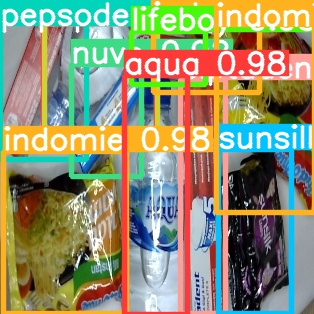

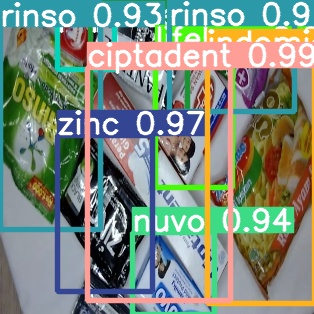

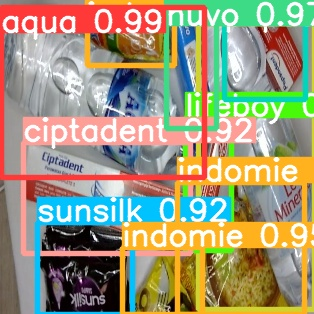

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/ultralytics/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")